In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2 
import os 
from PIL import Image

In [2]:
train_messy = "C:/Users/developer/Desktop/hari college kct/Even sem/RAC/AI domain/clean or messy room classifier task/Clean messy dataset/train/messy/"
train_clean= "C:/Users/developer/Desktop/hari college kct/Even sem/RAC/AI domain/clean or messy room classifier task/Clean messy dataset/train/clean/"
test_messy= "C:/Users/developer/Desktop/hari college kct/Even sem/RAC/AI domain/clean or messy room classifier task/Clean messy dataset/val/messy/"
test_clean= "C:/Users/developer/Desktop/hari college kct/Even sem/RAC/AI domain/clean or messy room classifier task/Clean messy dataset/val/clean/"
test="C:/Users/developer/Desktop/hari college kct/Even sem/RAC/AI domain/clean or messy room classifier task/Clean messy dataset/test/"
image_size = 128

In [3]:
def trainer_data():
    train_messy_room=[]
    train_clean_room=[]
    for image1 in (os.listdir(train_messy)):
        path=os.path.join(train_messy,image1)
        img1=cv2.imread(path)
        train_messy_room.append(img1)
    for image2 in (os.listdir(train_clean)):
        path=os.path.join(train_clean,image2)
        img2=cv2.imread(path)    
        train_clean_room.append(img2)
    training_data=np.concatenate((np.asarray(train_messy_room),np.asarray(train_clean_room))) 
    return training_data

In [4]:
def tester_data():
    test_messy_room=[]
    test_clean_room=[]
    for image1 in (os.listdir(test_messy)):
        path=os.path.join(test_messy,image1)
        img1=cv2.imread(path)
        test_messy_room.append(img1)
    for image2 in (os.listdir(test_clean)):
        path=os.path.join(test_clean,image2)
        img2=cv2.imread(path)    
        test_clean_room.append(img2)
    tests_data=np.concatenate((np.asarray(test_messy_room),np.asarray(test_clean_room))) 
    return tests_data

In [5]:
training_data=trainer_data()
testing_data=tester_data()

In [6]:
def train_data():
    train_data_messy = [] 
    train_data_clean=[]
    for image in (os.listdir(train_messy)): 
        path = os.path.join(train_messy, image)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_messy.append(img1) 
    for image2 in (os.listdir(train_clean)): 
        path = os.path.join(train_clean, image)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_clean.append(img2) 
    
    train_data= np.concatenate((np.asarray(train_data_messy),np.asarray(train_data_clean)))
    return train_data 

In [7]:
def test_data():
    test_data_messy = [] 
    test_data_clean=[]
    for image1 in (os.listdir(test_messy)): 
        path = os.path.join(test_messy, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_messy.append(img1) 
    for image2 in (os.listdir(test_clean)): 
        path = os.path.join(test_clean, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        test_data_clean.append(img2) 
    
    test_data= np.concatenate((np.asarray(test_data_messy),np.asarray(test_data_clean))) 
    return test_data 

In [8]:
train_data = train_data() 
test_data = test_data()

In [9]:
x_data=np.concatenate((train_data,test_data),axis=0)

In [10]:
x_data1=np.concatenate((training_data,testing_data))

In [11]:
z1 = np.zeros(96)
o1 = np.ones(96)
Y_train = np.concatenate((o1, z1), axis=0)
z = np.zeros(10)
o = np.ones(10)
Y_test = np.concatenate((o, z), axis=0)

In [12]:
y_data=np.concatenate((Y_train,Y_test),axis=0).reshape(x_data.shape[0],1)

In [13]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)
print("X1 shape: " , x_data1.shape)

X shape:  (212, 128, 128)
Y shape:  (212, 1)
X1 shape:  (212, 299, 299, 3)


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [17]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
x_test1_flatten = x_test1 .reshape(number_of_test,x_test1.shape[1]*x_test1.shape[2]*3)
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)
print("X test1 flatten",x_test1_flatten.shape)

X train flatten (180, 16384)
X test flatten (32, 16384)
X test1 flatten (32, 268203)


In [18]:
x_train = x_train_flatten
x_test = x_test_flatten
y_test = y_test
y_train = y_train
x_test1=x_test1_flatten
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)
print("x test1: ",x_test1.shape)

x train:  (180, 16384)
x test:  (32, 16384)
y train:  (180, 1)
y test:  (32, 1)
x test1:  (32, 268203)


In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression()

In [21]:
model.fit(x_train, y_train)

C:\Users\developer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [22]:
model.score(x_test, y_test)

0.90625

In [23]:
ans=model.predict(x_test[:10])
ans

array([1., 0., 0., 1., 1., 1., 1., 0., 1., 0.])

In [24]:
ans=list(map(lambda x:"Messy" if x else "Clean",ans))

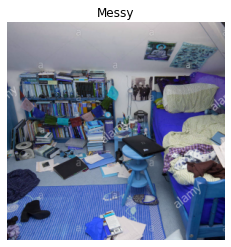

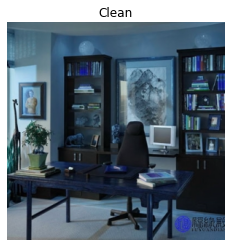

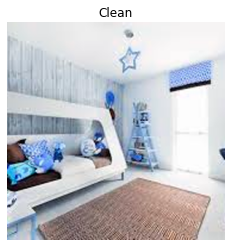

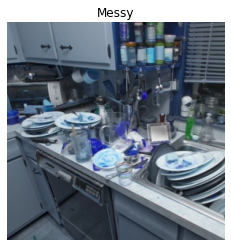

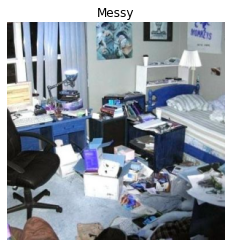

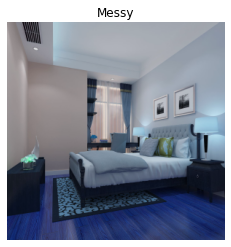

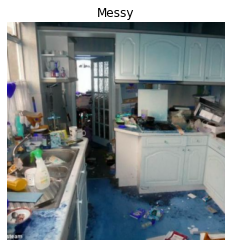

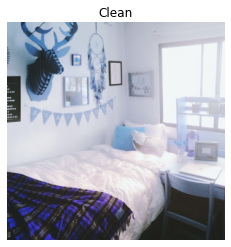

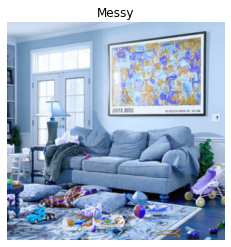

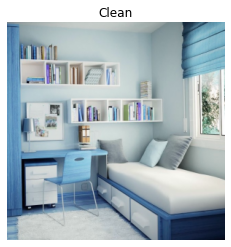

In [25]:
for i in range (len(ans)):
    plt.imshow(x_test1[i].reshape(299,299,3))
    plt.axis("off")
    plt.title(ans[i])
    plt.show()